### Machine Learning for Systems & Control 5SC28 2022-2023

# Exercise set W5 Reinforcement Learning Basics


This exercise set illutrates tabular Q-learning and its various properties. 

It also give some insight on how to define an effective observation space and reward function.

## Exercise 1: Multi-armed Bandit

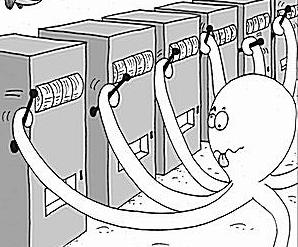

This exercise considers the multi-armed bandit problem (slide 19 Lecture 5A). We are playing on a 4 slot machines. At each time instance we can choose to play on one machine only. The slot machines give a reward $r$ which is either equal to $0$ or equal to $1$. The probability that slot machine $i$ gives a reward $r=1$ is denoted by $P_i$. Our goal is to maximize the cumulative reward $\sum_{k=1}^{N_{\text{steps}}} r_k$ for $N_{\text{steps}} = 10^3$. 

**a)** Derive the recursive equation discussed on slide 29 of Lecture 5A. In other words, show that:

$$
X_k = \frac{1}{k} \sum_{i=1}^k x_i = X_{k-1} + \frac{1}{k} \left (x_k - X_{k-1} \right )
$$


**Answer a):** fill by student

For the implementation of the multi-armed bandit problem, let us use the openAI gym environments https://gym.openai.com/. This  standardizes the environment construction and saves a lot of time in the long run (gym environment is also one of the available formats of the design assignment environment). 

By using the framework provided by openAI gym environments we can write algorithms which are applicable on many different environments. I recommend reading the open AI gym documentation https://gym.openai.com/docs/ to section "Available Environments" for a quick overview.

**b)** Run the example below and see how it works in this simplified setup. 

*Side note: The environment is set up such that we can input a lambda function to the elements of $P$ which is needed for e)*


In [ ]:
#you might still need to install the gym
#uncomment next statement to install the gym if you get an import error, and if that fails use the anaconda prompt
#!pip install gym

In [2]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class Multiarmed_bandit(gym.Env):
    def __init__(self, P = [lambda k: 0.5, lambda k: 0.4, lambda k: 0.7, lambda k: 0.6]):
        self.P = P
        self.action_space = spaces.Discrete(len(self.P)) #u = 0, 1, ..., len(P)-1
        self.k = 0
    
    def step(self, u):
        Pnow = self.P[u] #select the uth element
        obs = None
        reward = int(np.random.rand()<Pnow(self.k)) #set reward to 1 if random uniform < P
        done = True #there is no memory in the system
        info = {} #almost never used
        self.k += 1
        return obs, reward, terminated, truncated, info
        
env = Multiarmed_bandit()
obs, reward, terminated, truncated, info = env.step(0) #use arm 0
print('reward 1 =',reward)
obs, reward, terminated, truncated, info = env.step(0)
print('reward 2 =',reward)
obs, reward, terminated, truncated, info = env.step(0)
print('reward 3 =',reward)
obs, reward, terminated, truncated, info = env.step(1) #use arm 1
print('reward 1 on arm 1 =',reward)


reward 1 = 1
reward 2 = 0
reward 3 = 0
reward 1 on arm 1 = 0


**c)** Consider the multi-arm bandit problem with the probablities of $P_1 = 0.5$, $P_2 = 0.4$, $P_3 = 0.7$ and $P_4 = 0.6$. Implement the $\epsilon$-greedy approach with the Q averaging as discribed in **a)**. Apply this function with `epsilon=0.1` on the environment and observe the resulting Q values and the plot `Rewards_list` and ofcourse intepret the results.

*tip: if `alpha=None` it indicates to use averaging as in **a)** setup*

*tip: use the `argmax` function provided below which has some additional desired properties over `np.argmax` for it does not have bias for any choice*

The $\epsilon$-greedy approach is given by 
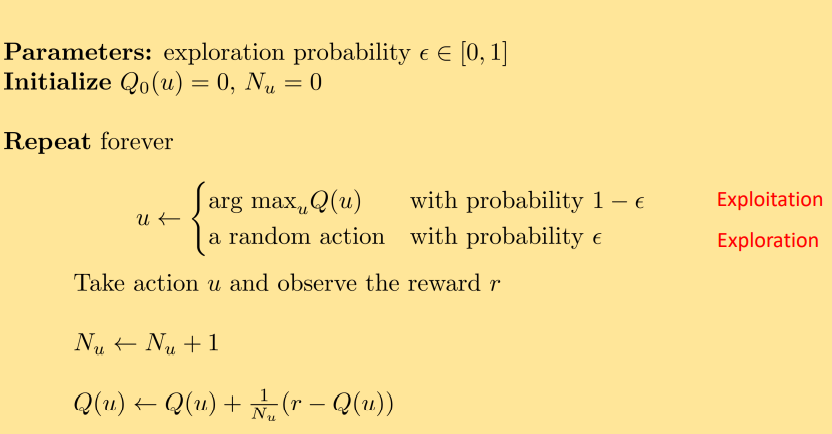

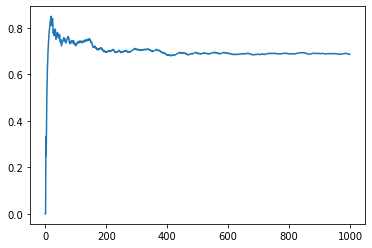

[0.39285714285714285, 0.411764705882353, 0.7073170731707312, 0.6388888888888888]


In [10]:
from matplotlib import pyplot as plt

def argmax(a):
    #argmax([0,1,2,3]) -> 3
    #argmax([0,1,2,2]) -> 2 or 3 with equal probability of both (np.argmax would only return 2)
    #argmax([0,0,0,0]) -> 0, 1, 2 or 3 with equal probability of each (np.argmax would only return 0)
    a = np.array(a)
    return np.random.choice(np.arange(a.shape[0],dtype=int)[a==np.max(a)])

def Qlearn_No_Obs(env, epsilon = 0.1, alpha=None, Nsteps = 1000):
    Q = [0,0,0,0]# c) Fill this
    N = [0,0,0,0]# c) Fill this
    
    #used for plotting later
    Rewards_acc = 0 # accumelated rewards
    Rewards_list = [] # the list of the mean reward obtained up until this point
    
    for k in range(1,Nsteps+1):
        u = np.random.randint(0,4) if np.random.random()<epsilon else argmax(Q)
        
        
        obs, reward, terminated, truncated, info = env.step(u)
        N[u] += 1
        
        if alpha is None: 
            Q[u] = Q[u] + 1/N[u]*(reward-Q[u])
        else: 
            dummy=1
            Q[u] = Q[u] + alpha*(reward-Q[u])
        #used for plotting later
        Rewards_acc += reward
        Rewards_list.append(Rewards_acc/k)
    return Q, np.array(Rewards_list)

env = Multiarmed_bandit()
Q, Reward_list = Qlearn_No_Obs(env)
plt.plot(Reward_list)
plt.show()
print(Q)
# c) Fill this


**d)** Use the cell below to study how the results are influenced by the choice of $\epsilon$. What happens when $\epsilon$ is too low and too high? Can you formulate this in terms of exploration and exploitation?

**Answer d):** fill by student

*tip: below `Ntrail` are done for different values of `epsilon` and plot the result of each.*

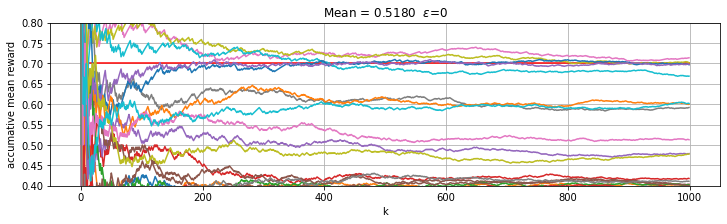

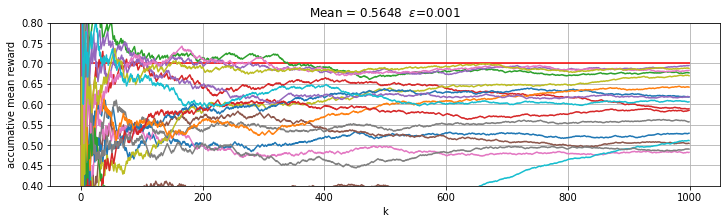

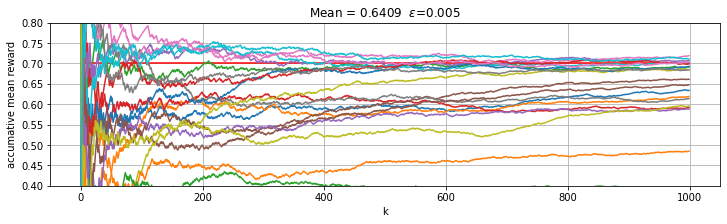

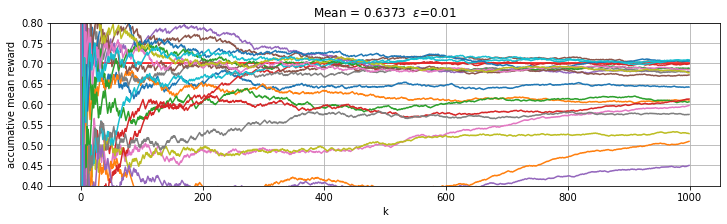

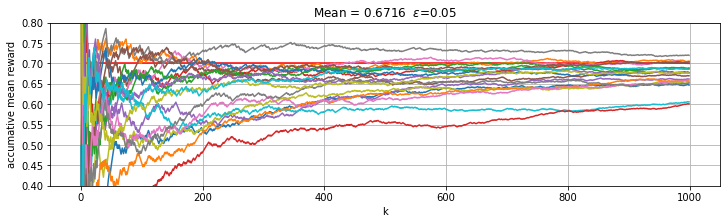

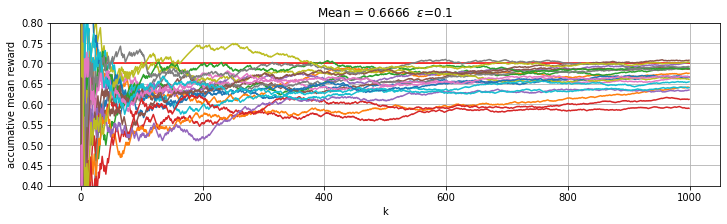

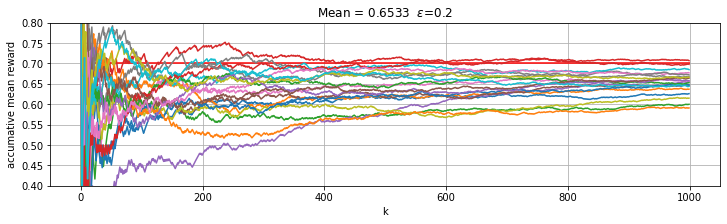

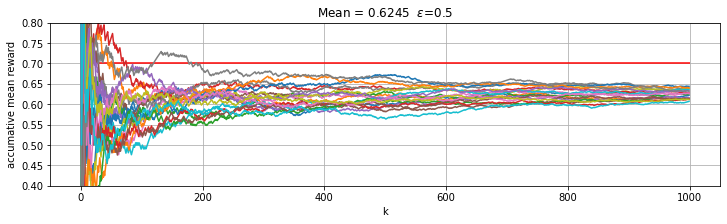

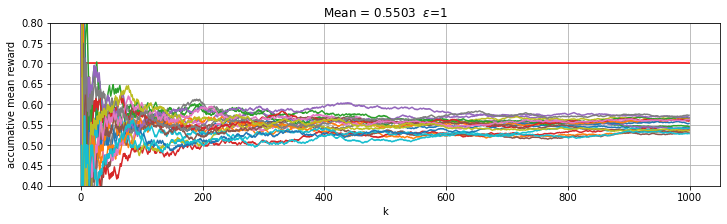

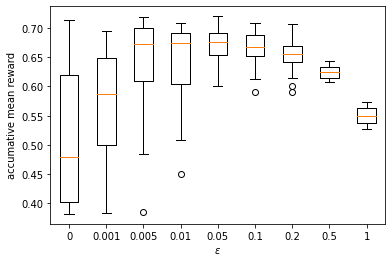

In [11]:
Ntrails = 20
RRewards = []
eps_list = [0,0.001,0.005,0.01,0.05,0.1,0.2,0.5,1]

for epsilon in eps_list:
    Rewards = []
    from matplotlib import pyplot as plt
    plt.figure(figsize=(12,3))
    for k in range(Ntrails):
        
        env = Multiarmed_bandit()
        Q, Rewards_list = Qlearn_No_Obs(env, epsilon=epsilon, Nsteps=1000)
        Rewards.append(Rewards_list[-1])
        plt.plot(Rewards_list)
        
    plt.grid()
    plt.title(fr'Mean = {np.mean(Rewards):.4f}  $\epsilon$={epsilon}')
    plt.hlines(0.7,0,len(Rewards_list),'r')
    plt.ylim(0.4,0.8)
    plt.xlabel('k')
    plt.ylabel('accumative mean reward')
    plt.show()
    
    RRewards.append(Rewards)

plt.boxplot(RRewards,labels=[str(eps) for eps in eps_list])
plt.xlabel(r'$\epsilon$')
plt.ylabel('accumative mean reward')
plt.show()
        
    

**e)** Now we consider the case where the probabilities $P_i(k)$ changes in time. Why would simply taking the average as we did before be sub-optimal?

**Answer e)** The results from 500 steps ago does not reflect the current probabilities hence we need to weigh the recent results more heavily over long past results.

**f)** Go back to the `Qlearn_No_Obs` function and implement the $\alpha$ update rule as seen in the lecture i.e.

$$
X_k = X_{k-1} + \alpha \underbrace{\left (x_k - X_{k-1} \right )}_{\text{Temporal Difference}}
$$

(re-run the cell after implementation) Similarly, explain what happens and why when $\alpha$ is too low and too high using the cell and plots below.

**Answer f)** For a low $\alpha$ the $Q$ values do not update fast enough to cope with the changes in $P_i(k)$ and if $\alpha$ is too high then it actually starts fitting on random noise and not converging to the real values of $P_i(k)$ ($Q$ does not reflect $P_i(k)$). The sweet spot in this example is around $\alpha=0.15$ but this problem-dependent.

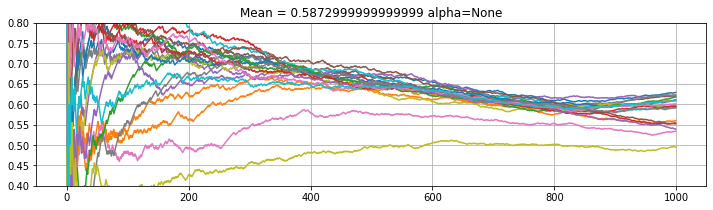

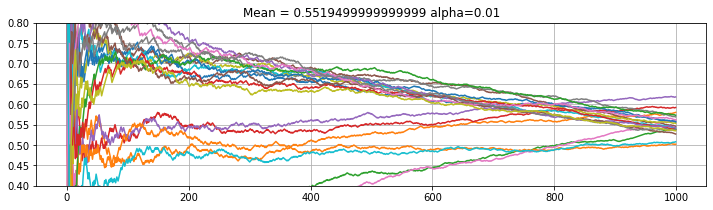

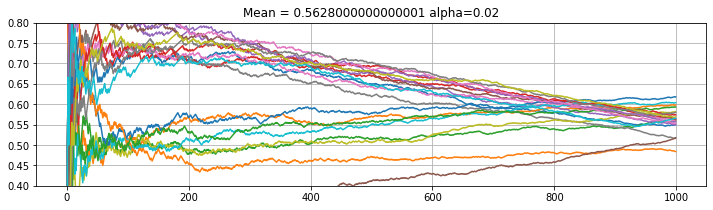

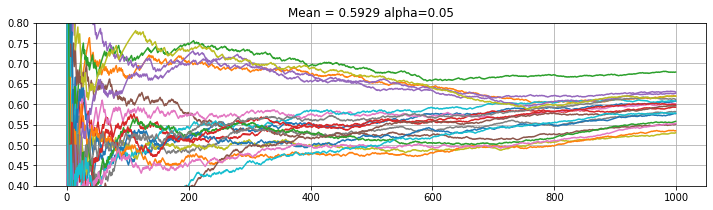

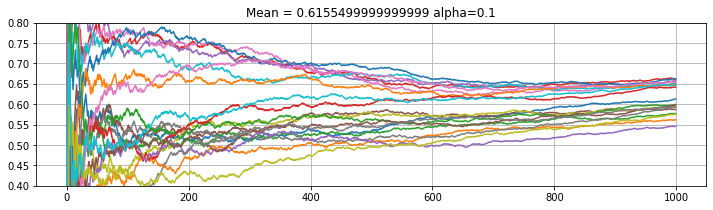

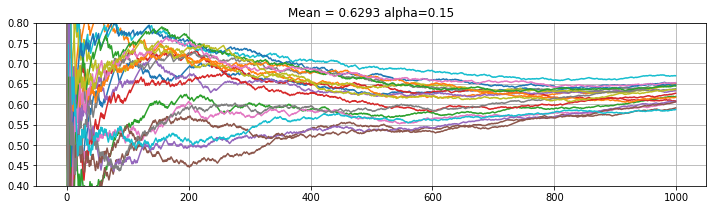

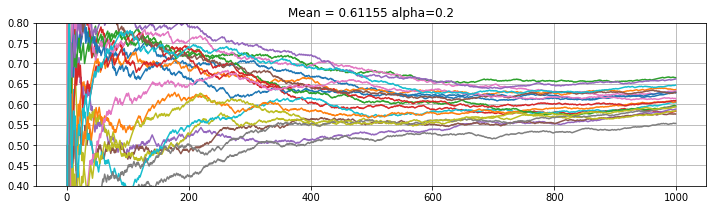

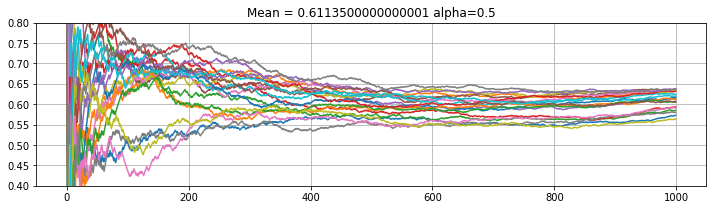

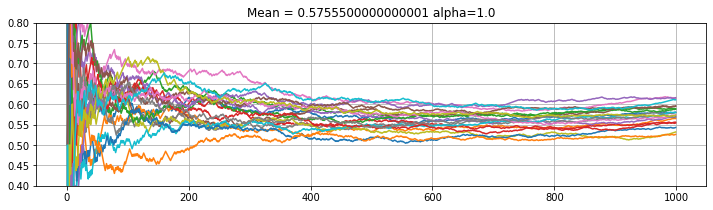

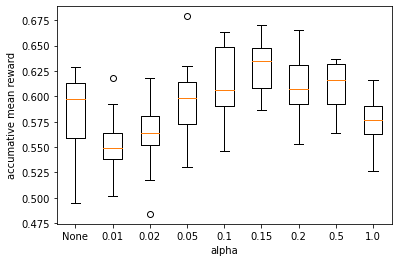

In [12]:
epsilon = 0.1
from matplotlib import pyplot as plt
alpha_list = [None, 0.01,0.02,0.05,0.1,0.15,0.2,0.5, 1.0]
RRewards = []
for alpha in alpha_list:
    Rewards = []
    plt.figure(figsize=(12,3))
    for k in range(20):
        Nsteps = 1000
        P1 = lambda k: 0.5 + 0.2*k/Nsteps
        P2 = lambda k: 0.3 + 0.5*k/Nsteps
        P3 = lambda k: 0.8 - 0.5*k/Nsteps
        P4 = lambda k: 0.5
        env = Multiarmed_bandit(P = [P1, P2, P3, P4])
        Q, Rewards_list = Qlearn_No_Obs(env, epsilon=epsilon, alpha=alpha, Nsteps=Nsteps)
        Rewards.append(Rewards_list[-1])
        plt.plot(Rewards_list)
    plt.grid()
    plt.title(f'Mean = {np.mean(Rewards)} alpha={alpha}')
    plt.ylim(0.4,0.8)
    plt.show()
    RRewards.append(Rewards)
plt.boxplot(RRewards,labels=[str(alpha) for alpha in alpha_list])
plt.xlabel('alpha')
plt.ylabel('accumative mean reward')
plt.show()

## Exercise 2: Grid World

This exercise explores how $Q$-learning can be used to solve a maze call Grid World. The environment is a maze 

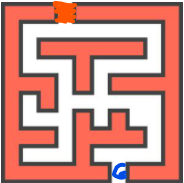

* Init: Random starting position
* Goal: Reach the goal (Blue G) by moving in all four directions
* Actions: 0 down, 1 right, 2 up, 3 left.
* Rewards/termenal conditions:
 * Walking into a wall gives a reward of -10 and set done=True.
 * Walking into the goal gives a reward of 100 and set done=True.
 * Otherwise reward is 0 and done=False.

**Run the cell below** to load in the environment. (Feel free to change the maze to test different configurations)

In [13]:
import gymnasium as gym
import numpy as np
from gymnasium import spaces

class Grid_world(gym.Env):
    
    ######
    # +--------> y (second dim)
    # |
    # |
    # v
    # x (first dim)
    #
    # u=0 -> x+
    # u=1 -> y+
    # u=2 -> x-
    # u=3 -> y-
    def __init__(self):
        
        self.action_space = spaces.Discrete(4) #u = 0, 1, ..., P-1
        self.Goal = 2
        G = self.Goal
        self.Wall = -1
        W = self.Wall
        self.grid = [ #feel free to change the maze
                     [W,W,W,W,W,W,W,W,W,W],
                     [W,0,0,0,0,0,0,0,0,W],
                     [W,0,W,W,W,W,W,W,0,W],
                     [W,0,0,0,W,0,0,0,0,W],
                     [W,W,W,0,W,0,W,W,W,W],
                     [W,0,W,0,0,0,0,0,0,W],
                     [W,0,0,0,W,0,W,0,0,W],
                     [W,W,W,0,W,W,W,W,0,W],
                     [W,0,0,0,W,0,0,0,0,W],
                     [W,W,W,W,W,W,G,W,W,W],
                    ]
        self.grid = np.array(self.grid,dtype=int)
        self.observation_space = spaces.MultiDiscrete(self.grid.shape)
        self.reset()
        
    
    def reset(self):
        while True:
            self.p = [np.random.randint(low=0,high=self.grid.shape[0]),np.random.randint(low=0,high=self.grid.shape[1])]
            if self.grid[self.p[0],self.p[1]]==0:
                break
        return tuple(self.p)
    
    def step(self, u):
        ########
        #  2
        #  ^
        #3<+>1
        #  v
        #  0
        
        if u==0:
            self.p[0] += 1
        elif u==1:
            self.p[1] += 1
        elif u==2:
            self.p[0] -= 1
        elif u==3:
            self.p[1] -= 1
        
        end_loc = self.grid[self.p[0],self.p[1]]
        if end_loc==self.Goal: #goal
            reward = 100
            done = True
        elif end_loc==0: #tile
            reward = 0
            done = False
        elif end_loc==self.Wall: #wall
            reward = -10
            done = True
        return tuple(self.p), reward, done, {}
    
    def render(self, Qmat=None, mode='human'):
        from collections import defaultdict
        for x in range(self.grid.shape[0]):
            for y in range(self.grid.shape[1]):
                el = self.grid[x,y]
                if el==-1:
                    print('#',end='')
                elif el==2:
                    print('G',end='')
                elif Qmat is None and el==0:
                    if x==self.p[0] and y==self.p[1]:
                        print('P',end='')
                    else:
                        print(' ',end='')
                else:#← ↑ → ↓
                    if isinstance(Qmat,defaultdict):
                        abest = argmax([Qmat[(x,y),a] for a in range(4)])
                    else: #an array
                        abest = argmax(Qmat[x,y,:])
                    print('↓→↑←'[abest],end='')
            print()

**a)** Solve the maze manually by running the cell below and giving inputs (type `down`,`right`,`up` or `left` and enter). Take note of what is returned by env.step. Also, take note of `env.observation_space` and `env.action_space` for you will need that later.

In [ ]:
from IPython.display import clear_output
import time
env = Grid_world() #crease 
print('observation space =',env.observation_space, env.observation_space.nvec)
print('action space =',env.action_space)
obs, info = env.reset() #reset environment
convert = {'down':0, 'right':1, 'up':2, 'left':3} #to convert from text to input number
done = False
while True:
    env.render() # print the maze
    if done:
        if reward==-10:
            print("You Died")
        elif reward==100:
            print('Goal Reached!')
        break
    print('What action do you want to  take? (type up, down, left or right)')
    time.sleep(1/4) # wait a bit
    s = input() # take input from user
    action = convert[s] # convert text to action (0,1,2 or 3)
    clear_output(wait=True)
    obs, reward, terminated, truncated, info = env.step(action) #take action
    print('obs=',obs) # observation/measurment/state
    print('reward=',reward) # reward = -10 if you bump into a wall, 100 if you reach to goal and 0 otherwise
    print('done=',done) # is true if you bump into a wall or solve the maze

We saw in the lecture that the $Q$-learning algorithm is given by 

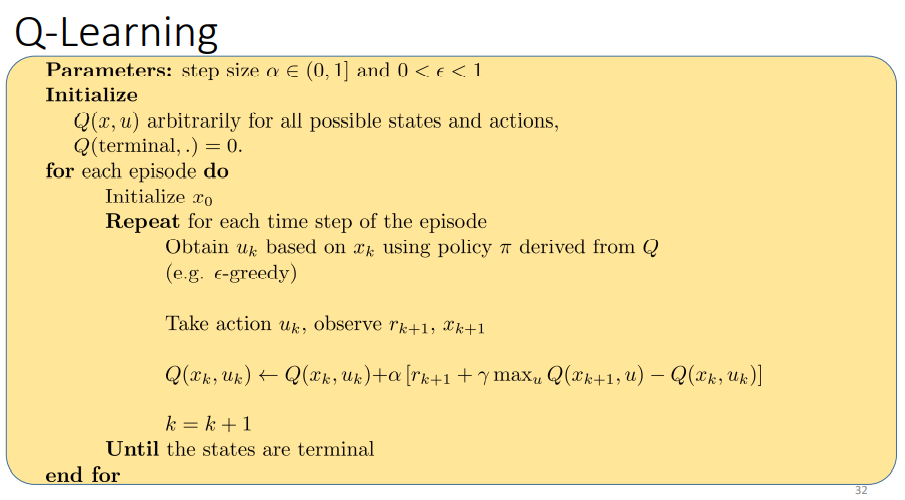

However, there is a problem with implemeting this directily for it is often unkown which states are terminal states. For that reason we will be using a alternative but equivilent algorithm which goes as follows

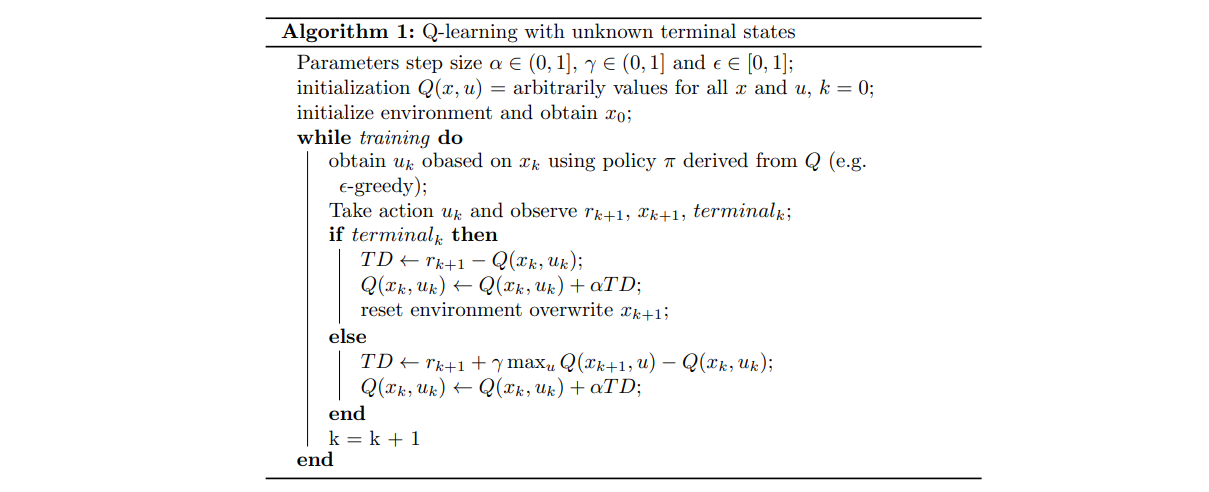

**b)** Verifiy that these two algorithm are mostly the same algorithm. 

**c)** Solve the Grid world using $Q$-learning with $\epsilon$-greed and a discount factor $\gamma$. In your implementation carefully consider the shape that the NumPy array of $Q(x,u)$ needs to have to be successful. 

*tip: What is the range of values of the observations and actions can have?*


In [20]:
def argmax(a):
    #random argmax
    a = np.array(a)
    return np.random.choice(np.arange(len(a),dtype=int)[a==np.max(a)])

def QlearnGrid(env, alpha=0.1, epsilon=0.1, gamma=1.0, nsteps=10000):
    #init Q:
    Qmat = np.zeros(tuple(env.observation_space.nvec)+(env.action_space.n,))# b) Fill this
    obs, info = env.reset()
    for z in range(nsteps):
        u = env.action_space.sample() if np.random.random()<epsilon else argmax(Qmat[obs[0],obs[1],:])
        
        obs_new, reward, terminated, truncated, info = env.step(u)
        if done:
            TD = reward-Qmat[obs[0],obs[1],u]
            Qmat[obs[0],obs[1],u] = Qmat[obs[0],obs[1],u] + alpha*TD
            obs, info = env.reset()
        else:
            TD = reward+gamma*np.max(Qmat[obs_new[0],obs_new[1],:])-Qmat[obs[0],obs[1],u]
            Qmat[obs[0],obs[1],u] = Qmat[obs[0],obs[1],u] + alpha*TD
            obs = obs_new
    return Qmat

env = Grid_world()
Qmat = QlearnGrid(env, alpha=0.1, epsilon=0.1, gamma=0.99, nsteps=100_000)
env.render(Qmat)

##########
#↓←→→→→→↓#
#↓######↓#
#→→↓#↓←←←#
###↓#↓####
#↓#→→→→→↓#
#→→↑#↑#→↓#
###↑####↓#
#→→↑#→↓←←#
######G###


For tabular Q-learning there exists quite an elegant and effective solution using `defaultdict`. See [Instructions](https://realpython.com/python-defaultdict/) and example below, (also see [Mutable vs Immutable Objects in Python](https://www.geeksforgeeks.org/mutable-vs-immutable-objects-in-python/))

In [ ]:
from collections import defaultdict
Q = defaultdict(lambda: float(0))
print(Q[10,2]) #prints 0 and creates an new element
Q[(10,10),5] += 1
print(Q) #has two values without having explictly initalize them
# Q[[10,10],5] #This is not allowed, no lists or arrays allowed as arguments, tuples are oke
             #It only allows for Immutable Objects see link above
             # use Q[tuple([10,10]),5] insteed

This is quite desirable for it can deal with any size of observation space and any size of action space. Moreover, it only creates the element which is actually reachable (e.g. the corners of the maze are included in the array solution but never used) which can save a lot of memory in larger problems. See the example below for how one could implement it.

In [ ]:
from collections import defaultdict
def Qlearn(env, alpha=0.1, epsilon=0.1, gamma=1.0, nsteps=10000):
    Qmat = defaultdict(lambda: float(0)) #any new argument be set to zero
    obs, info = env.reset()
    for z in range(nsteps):
        if np.random.uniform()<epsilon:
            action = env.action_space.sample()
        else:
            action = argmax([Qmat[obs,a] for a in range(env.action_space.n)])

        obs_new, reward, done, _ = env.step(action)

        if done:
            TD = reward - Qmat[obs,action] #adventage
            Qmat[obs,action] += alpha*TD
            obs, info = env.reset()
        else:
            Qmax = max(Qmat[obs_new, action_next] for action_next in range(env.action_space.n))
            TD = reward + gamma*Qmax - Qmat[obs,action] #adventage
            Qmat[obs,action] += alpha*TD
            obs = obs_new
    return Qmat

env = Grid_world()
obs, info = env.reset()
Qmat = Qlearn(env, alpha=0.1, epsilon=0.1, gamma=0.99, nsteps=10_000)
env.render(Qmat)
print(len(Qmat))

## Exercise 3: Race Track

Let us apply $Q$-learning on an environment that is considerably more complex, a race track!

Below you can see the trajectory of a trained Q-learning agent in this environment;

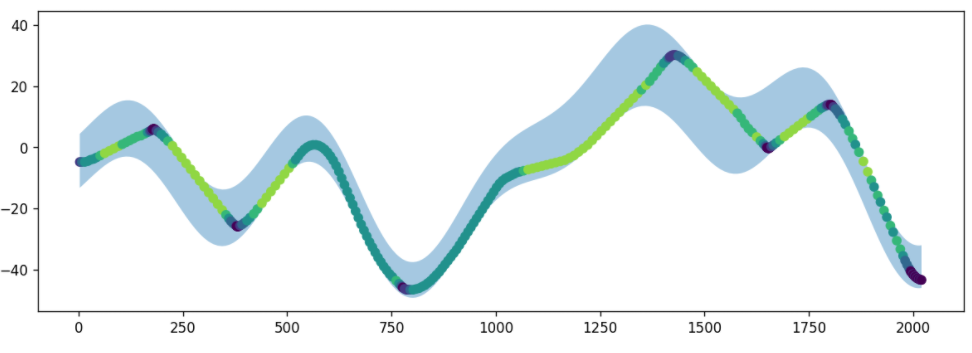

And how the sensors are possitioned (green = car, blue = active, red = not active)

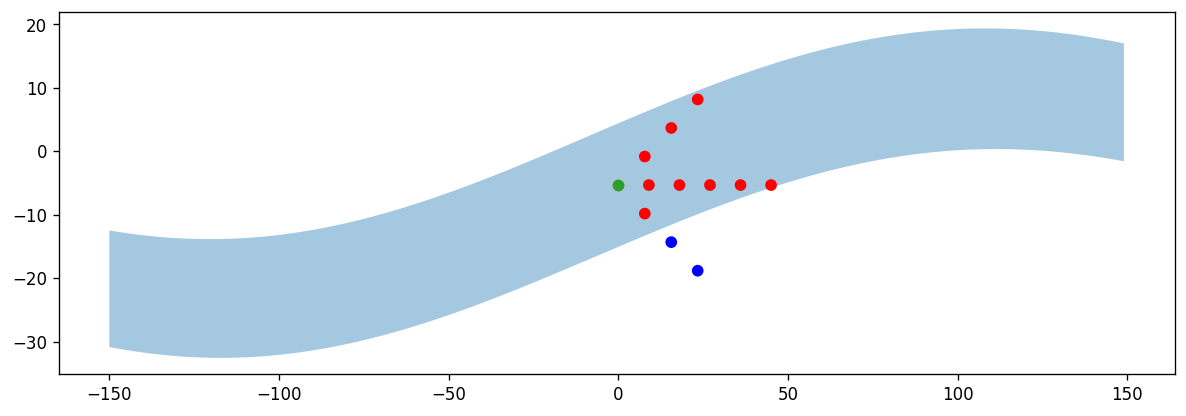

The environment consists of the following

* Track: 
  * Random phase multi-sin with constant width
* Actions: (5)
  * 0 turn left
  * 1 turn right
  * 2 do nothing
  * 3 speed up
  * 4 slow down
* observation: (7,4,6,4)
  * Velocity: 7 values
  * Sensors: 3 Arrays of sensors as seen in the figure above  (1 more than the number of sensors)
    * 3 sensores pointed left 
    * 5 pointed straight
    * 3 sensores pointed right (state from above picture would be (0,3,5,1) = (speed,left, straight, right))
* Reward/terminal state:
  * Off track: 
    * reward = -1000 and done=True
  * On track:
    * reward = vertical speed and done=False

**Run the cell below**

(0, 3, 5, 1)


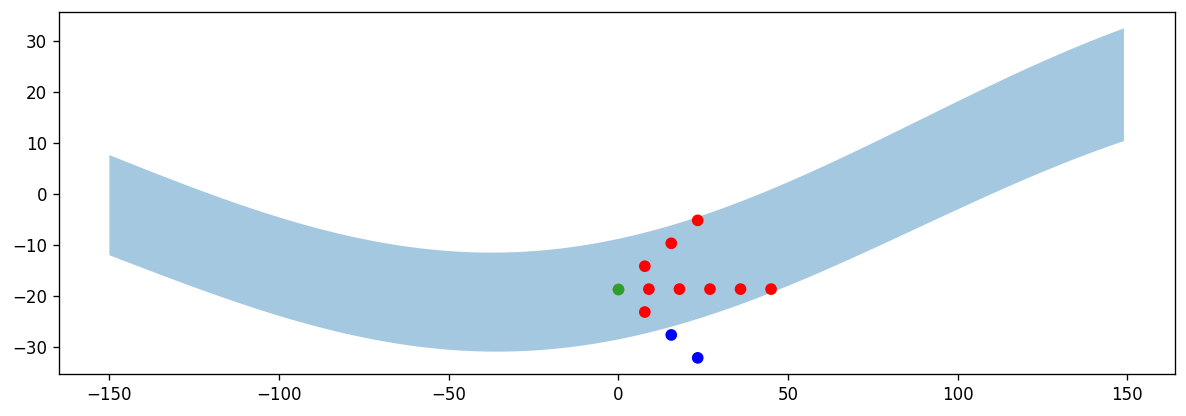

In [21]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
class race_track(gym.Env):
    def __init__(self):
        #obs =  [car.speed, car.s(1).value, car.s(2).value, car.s(3).value];
        self.observation_space = spaces.MultiDiscrete((7,4,6,4))
        self.action_space = spaces.Discrete(5)
        self.sensordist = 9
        self.maxspeed = 6
        self.vStep = 2
        self.hStep = 2
        #0 Turn left
        #1 Turn Right
        #2 Do nothing
        #3 Slow down
        #4 speedup
#     car.s(1).heading = 30;
#     car.s(1).distance = 9;
#     car.s(1).nDistances = 3;
#     car.s(2).heading = 0;
#     car.s(2).distance = 9;
#     car.s(2).nDistances = 5;
#     car.s(3).heading = -30;
#     car.s(3).distance = 9;
#     car.s(3).nDistances = 3;
        self.reset()

    def step(self,action):
        assert self.action_space.contains(action), "%r (%s) invalid"%(action, type(action))
        if action==0:
            self.heading += self.hStep
        elif action==1:
            self.heading -= self.hStep
        elif action==2:
            pass
        elif action==3: #slow down
            self.speed = self.speed - 1 if self.speed>0 else 0
        elif action==4: #speed up
            self.speed = self.speed + 1 if self.speed<self.maxspeed else self.speed
        
        real_speed = self.speed*self.vStep + 1
        self.x = (self.x + np.cos(self.heading/180*np.pi)*real_speed)%self.tracklength
        self.y = self.y + np.sin(self.heading/180*np.pi)*real_speed;
#         print((self.track(self.x)+self.width(self.x)<self.y) , (self.track(self.x)-self.width(self.x)>self.y))
        if (self.track(self.x)+self.width(self.x)<self.y) or (self.track(self.x)-self.width(self.x)>self.y):
            self.done = True
            reward = -1000
        else:
            self.done = False
            reward = np.cos(self.heading/180*np.pi)*(real_speed - 1)
        return self.get_state(), reward, self.done, {}

    def reset(self):
        self.phase = np.random.uniform(size=6)*2*np.pi; #% random shape
        self.tracklength = 4096       #% track length
        f0 = 2*np.pi/self.tracklength    #% base frequency for track generation
        self.track = lambda x: 10*(np.sin(f0*x + self.phase[0]) + np.sin(2*f0*x + self.phase[1]) + \
                         np.sin(3*f0*x + self.phase[2]) + np.sin(4*f0*x + self.phase[3]) + \
                         np.sin(7*f0*x + self.phase[4]) + np.sin(10*f0*x + self.phase[5]))
        self.width = lambda x: 10 + 1.5*(np.sin(f0*x + self.phase[0]) + np.sin(2*f0*x + self.phase[1]) + \
                                         np.sin(3*f0*x + self.phase[2]) + np.sin(4*f0*x + self.phase[3])) #periodic strack
        self.x = 0
        self.y = self.track(self.x)
        self.heading = 0
        self.speed = 0
        return self.get_state()

    def get_state(self):
        state = [self.speed]
        for sensor_angle, nsensors in [(30,3), (0,5), (-30,3)]:
            for k in range(1, nsensors+1): #1,2,3
                posx = self.x + np.cos((self.heading+sensor_angle)/180*np.pi)*self.sensordist*k
                posy = self.y + np.sin((self.heading+sensor_angle)/180*np.pi)*self.sensordist*k
                intrack = self.track(posx)-self.width(posx) < posy < self.track(posx)+self.width(posx)
                if not intrack:
                    break
            else: #only runs when the for loop didn't break
                k = nsensors+1
            k -= 1 #0 = all sensors outisze of track, 1 = one sensor out of track
            state.append(k)
        return tuple(state)
    
    def seed(self,seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def render(self, mode='human', close=False):
        from matplotlib import pyplot as plt
#         x = np.arange(self.tracklength)
        x = np.arange(self.x-150,self.x+150)
        track = self.track(x)
        width = self.width(x)
        plt.figure(figsize=(12,4),dpi=120)
        plt.fill_between(x,track-width,track+width,alpha=0.4)
        plt.scatter([self.x],[self.y])
        sensx = []
        sensy = []
        colours = []
        for sensor_angle, nsensors in [(30,3), (0,5), (-30,3)]:
            for k in range(1, nsensors+1): #1,2,3
                posx = self.x + np.cos((self.heading+sensor_angle)/180*np.pi)*self.sensordist*k
                posy = self.y + np.sin((self.heading+sensor_angle)/180*np.pi)*self.sensordist*k
                sensx.append(posx)
                sensy.append(posy)
                intrack = self.track(posx)-self.width(posx) < posy < self.track(posx)+self.width(posx)
                colours.append('r' if intrack else 'b')
                
        plt.scatter([self.x],[self.y])
        plt.scatter(sensx,sensy,c=colours)
        plt.show()

from matplotlib import pyplot as plt

def traject(Qmat):
    env = race_track()
    obs, info = env.reset()
    done = False
    xar = []
    yar = []
    speedar = []
    actar = []
    for i in range(300):
        action = argmax([Qmat[obs,act] for act in range(env.action_space.n)])
        actar.append(action)
        obs, reward, done, _ = env.step(action)
        xar.append(env.x)
        yar.append(env.y)
        speedar.append(env.speed)
        if done:
            break
    return [np.array(a) for a in [xar, yar, speedar, actar]]+[env]

def visualize_traject(Qmat):
    xar, yar, speedar, actar, env = traject(Qmat)

    track = env.track(xar)
    width = env.width(xar)
    plt.figure(figsize=(12,4),dpi=120)
    plt.fill_between(xar,track-width,track+width,alpha=0.4)
    plt.title(f'Average vertical speed = {xar[-1]/300}')
    plt.scatter(xar,yar,color=plt.get_cmap('viridis')(np.array(speedar)/6))
    plt.show()
        
env = race_track()
print(env.reset())
env.render()

 We have already set up the implementation of $Q$-learning on this problem (`Qlearn` function). This implementation saves the past obtained rewards in a rolling average called `reward_rolling` and save this rolling average in a list of `reward_rolling_hist` each `callbackfeq` steps. 
 
**a)** Apply the `Qlearn` function to the rasecar enviroment and plot the resulting reward history. Also use the `visualize_traject` function to show the trajectory which is obtained using `Qmat`. Lastly, manually change the hyperparameters to find which give good performance.

As you might notice the optimization is not really that smooth and monotone increasing. A problem what this can give is that the optimization stops right in one of the dips resulting in quite a bad `Qmat` compared to other possible choices. This is even more of an issue when we are transitioning to Deep Reinforcement Learning in the next lecture. One practical way to have a callback function that checks if the current `Qmat` is better or worst than the current best known `Qmat` using a deterministic test ($\epsilon=0$). 

**b)** Write the test function which calculates the mean accumulated rewards on a given `Qmat` and saves a copy it a global variable `Qbest` if a new best-known performance is obtained.

*tip: to copy Qmat use the deepcopy function `from copy import deepcopy`.*

*tip: do no use $\epsilon$ greed in the test function*



In [22]:
def Qlearn(env_con, nsteps=50_000, callbackfeq=1000, alpha=0.2, eps=0.2, gamma=0.99, callback=None):
    from collections import defaultdict
    Qmat = defaultdict(float) #any new argument be set to zero
    reward_rolling = -20
    reward_rolling_alpha = 1/500
    reward_rolling_hist = []
    
    env = env_con()
    obs, info = env.reset()
    for z in range(nsteps):

        if np.random.uniform()<eps:
            action = env.action_space.sample()
        else:
            action = argmax([Qmat[obs,a] for a in range(env.action_space.n)])

        obs_new, reward, done, _ = env.step(action)

        if done:
            A = reward - Qmat[obs,action] #adventage
            Qmat[obs,action] += alpha*A
            obs, info = env.reset()
        else:
            A = reward + gamma*max(Qmat[obs_new, action_next] for action_next in range(env.action_space.n)) - Qmat[obs,action]
            Qmat[obs,action] += alpha*A
            obs = obs_new
            
        
        #callback and 
        reward_rolling = reward_rolling*(1-reward_rolling_alpha) + reward*reward_rolling_alpha
        if z%callbackfeq==0:
            reward_rolling_hist.append(reward_rolling)
            print('Rolling average at', z, 'has', reward_rolling)
        
        if callback and z%callbackfeq==0:
            callback(Qmat,z,env_con)
    return Qmat, np.array(reward_rolling_hist)


best_rewards = -float('inf') #needed for b) #best known test result
Qbest = None #needed for b)
def test(Qmat,z,env_con):
    global best_rewards, Qbest
    env = env_con() #make a new test environment
    # b) Fill this
    return None
        
Qlearn(race_track)
# a) Fill this
# b) Fill this


Rolling average at 0 has -19.956
Rolling average at 1000 has -28.845800283681957
Rolling average at 2000 has -20.243501177382736
Rolling average at 3000 has -25.023389805100788
Rolling average at 4000 has -14.842618524580056
Rolling average at 5000 has -5.879183569224566
Rolling average at 6000 has -11.3213455310599
Rolling average at 7000 has -5.707547425569066
Rolling average at 8000 has -14.1124500087885
Rolling average at 9000 has -5.122267744737691
Rolling average at 10000 has -8.925199078590282
Rolling average at 11000 has -9.872626122290367
Rolling average at 12000 has -8.168743397770639
Rolling average at 13000 has -11.452425577107231
Rolling average at 14000 has -6.800942159378632
Rolling average at 15000 has -4.421893588035582
Rolling average at 16000 has -6.748287094659051
Rolling average at 17000 has -4.271724616658065
Rolling average at 18000 has -1.7830465556309285
Rolling average at 19000 has -3.540513466861157
Rolling average at 20000 has -2.3203168304194395
Rolling ave

(defaultdict(float,
             {((0, 3, 5, 2), 0): 17.79133191181091,
              ((0, 3, 5, 2), 1): 0.97269667343214,
              ((0, 3, 5, 2), 2): 2.5257735623945434,
              ((0, 3, 5, 2), 3): 14.19101319891282,
              ((0, 3, 5, 2), 4): 157.68823202364896,
              ((1, 3, 5, 2), 0): 90.9679180213924,
              ((1, 3, 5, 2), 1): 90.70942575035738,
              ((1, 3, 5, 2), 2): 204.26474366800034,
              ((1, 3, 5, 2), 3): 53.651137645844756,
              ((1, 3, 5, 2), 4): 129.53929288059027,
              ((1, 2, 5, 2), 0): 164.74080079043222,
              ((1, 2, 5, 2), 1): 125.48755846847914,
              ((1, 2, 5, 2), 2): 112.30491542818473,
              ((1, 2, 5, 2), 3): 86.14024449643746,
              ((1, 2, 5, 2), 4): 88.74489169816457,
              ((0, 2, 5, 2), 0): 7.947269089812282,
              ((0, 2, 5, 2), 1): 27.19425903707203,
              ((0, 2, 5, 2), 2): 40.631269758286145,
              ((0, 2, 5, 2), 3): 34.4

Here the difference might not be too large but later on during DRL it will become very important.

## Exercise 4: State Discretization Mountain Car

Up until now, you have only worked with discrete states, however, many control problems have continuous measurement and maybe even continuous actions spaces.

An example of an environment with a continuous state is the MountainCar problem. [Link](https://gym.openai.com/envs/MountainCar-v0/)

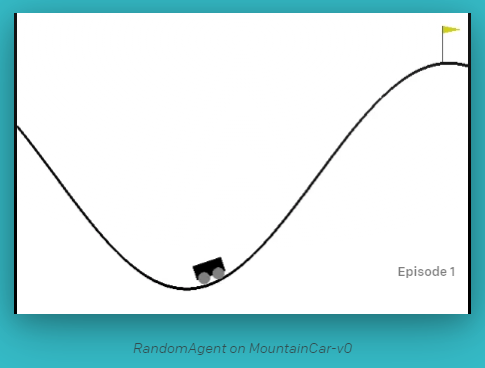

> A car is on a one-dimensional track, positioned between two "mountains". The goal is to drive up the mountain on the right; however, the car's engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum.

**Run the cell below** and observe that the observation space is continuous and cannot be captured in a simple look-up table


In [24]:
import time, gym
import gym.envs.classic_control
import gym.wrappers
from gymnasium import spaces
import numpy as np
env = gym.envs.classic_control.MountainCarEnv()
env = gym.wrappers.TimeLimit(env, max_episode_steps=300)
print('action_space = ', env.action_space) # 3 actions
print('observation_space = ', env.observation_space) # a box hence continous observation/state
obs, info = env.reset()
print('obs =', obs)
try:
    env.render()
    done=False
    while done==False: #runs for 300 steps due to the TimeLimit Wrapper
        obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
        env.render()
        time.sleep(1/60)
finally:
    env.close()

action_space =  Discrete(3)
observation_space =  Box(2,)
obs = [-0.55732608  0.        ]


In the example above I used a wrapper to have the environment return `done=True` if 300 steps have been taken. Wrappers are quite an elegant way to modify elements like; inputs, outputs, dones, reward functions and more of an environment. This exercise uses wrappers to discretize the state.

For instance, below you can find a wrapper that saves the past outputs. This is necessary if your environment is not fully observable (e.g. measuring only the position but speed is also important for control).

In [ ]:
from gym import Wrapper
from collections import deque #a list with a fixed lenght
class histwrapper(Wrapper):
    def __init__(self, env, Nhist=7):
        super(histwrapper, self).__init__(env) #sets self.env
        
        shape = env.observation_space.shape #load the obs shape
        shapehist = (Nhist,) + shape #add (Nhist)
        h = env.observation_space.high*np.ones(shapehist) #the upperbounds
        l = env.observation_space.low*np.ones(shapehist) #the lowerbounds
        self.observation_space = spaces.Box(low=l.astype(np.float32),high=h.astype(np.float32)) #modify the observation_space
        self.hist = deque([],Nhist)
        self.Nhist = Nhist
        
    def step(self, action):
        observation, reward, terminated, truncated, info = self.env.step(action)
        self.hist.append(observation)
        observation = np.array(self.hist)
        return observation, reward, terminated, truncated, info

    def reset(self):
        observation = self.env.reset()
        self.hist.extend([observation]*self.Nhist)
        observation = np.array(self.hist)
        return observation
env = gym.envs.classic_control.MountainCarEnv()

env = histwrapper(env, Nhist=4)
env.reset()
print(env.step(0))
print(env.step(0))

**a)** Derive an equation which can discretize the state $x$ into $x_d$ where is given the upper bound $h$ and lower bound $l$ and split into $n$ section of equal size. e.g. see figure below where $x$ falls in the interval where $x_d=2$

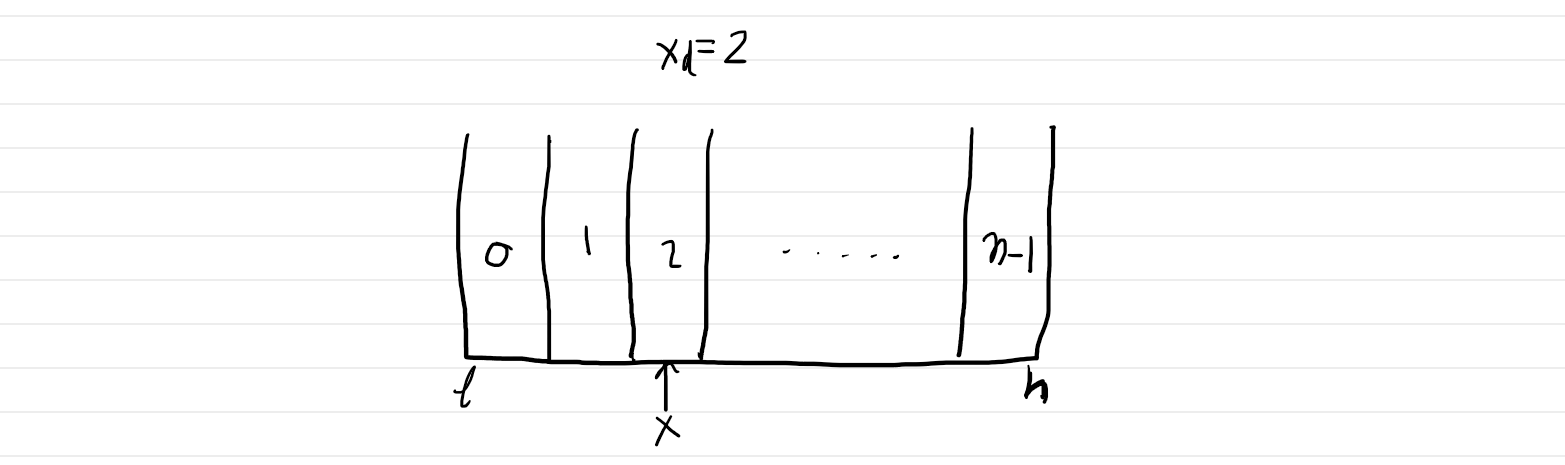

**Answer a):** fill by student


**b)** Write a wrapper that can discretize the state according to the vector $n$ in each dimension. 

*tip: do not forget to discretize the output of the reset function*

*tip: do not forget to self.observation_space to a MultiDiscrete space*

*tip: convert the discretized state to a tuple to be able to use it in `defaulthdict` approach*

In [ ]:
class Discretize_obs(gym.Wrapper):
    def __init__(self, env, nvec=10):
        super(Discretize_obs, self).__init__(env) #sets self.env
        if isinstance(nvec,int): #nvec in each dimention
            self.nvec = [nvec]*np.prod(env.observation_space.shape,dtype=int)
        else:
            self.nvec = nvec
        self.nvec = np.array(nvec) #(Nobs,) array
        
        # b) Fill this
    def step(self, action):
        # b) Fill this
    def reset(self):
        # b) Fill this
env = gym.envs.classic_control.MountainCarEnv()
env = Discretize_obs(env,nvec=100)
env.reset()
print(env.step(0)) #testing
print(env.step(0))
print(env.step(0))
print(env.step(0))
print(env.step(2))
print(env.step(2))
print(env.step(2))

**c)** Use your `Discretize_obs` wrapper to learn a policy for the mountain car problem. In this understand how a large and small discretization factor influences the optimization speed and final performance And what is the optimal discretization factor for this problem?

**Answer c):** fill by student

*tip: make a for loop for multiple nvec and plot the results together*

*Important side note: when using a TimeLimit wrapper it is essential to no see the final state at the time limit as a terminal state. This needs to be carefully dealt with. [Discussion on this fact](https://www.reddit.com/r/reinforcementlearning/comments/bb5mzl/d_confused_about_envis_done/) Below you can see my (not so elegant) correction for this problem*

In [ ]:
def roll_mean(ar,start=2000,N=50): #smoothing if needed
    s = 1-1/N
    k = start
    out = np.zeros(ar.shape)
    for i,a in enumerate(ar):
        k = s*k + (1-s)*a
        out[i] = k
    return out

def Qlearn(env, nsteps=5000, callbackfeq=100, alpha=0.2,eps=0.2, gamma=0.99):
    from collections import defaultdict
    Qmat = defaultdict(float) #any new argument set to zero
    env_time = env
    while not isinstance(env_time,gym.wrappers.time_limit.TimeLimit):
        env_time = env_time.env
    ep_lengths = []
    ep_lengths_steps = []
    
    obs, info = env.reset()
    print('goal reached time:')
    for z in range(nsteps):

        if np.random.uniform()<eps:
            action = env.action_space.sample()
        else:
            action = argmax([Qmat[obs,i] for i in range(env.action_space.n)])

        obs_new, reward, terminated, truncated, info = env.step(action)

        if done and not info.get('TimeLimit.truncated', False): #terminal state = done and not by timeout
            #saving results:
            print(env_time._elapsed_steps, end=' ')
            ep_lengths.append(env_time._elapsed_steps)
            ep_lengths_steps.append(z)
            
            #updating Qmat:
            A = reward - Qmat[obs,action] # adventage or TD
            Qmat[obs,action] += alpha*A
            obs, info = env.reset()
        else: #done by timeout or not done
            A = reward + gamma*max(Qmat[obs_new, action_next] for action_next in range(env.action_space.n)) - Qmat[obs,action]
            Qmat[obs,action] += alpha*A
            obs = obs_new
            
            if info.get('TimeLimit.truncated',False): #done by timeout
                #saving results:
                ep_lengths.append(env_time._elapsed_steps)
                ep_lengths_steps.append(z)
                print('out', end=' ')
                
                #reset:
                obs, info = env.reset()
    print()
    
    return Qmat, np.array(ep_lengths_steps), np.array(ep_lengths)



# c) Fill this
    Qmat, ep_lengths_steps, ep_lengths = # c) Fill this


A simple render block:

In [ ]:
# env = gym.envs.classic_control.MountainCarEnv() 
# env = gym.wrappers.time_limit.TimeLimit(env,max_episode_steps=1000)
# env = Discretize_obs(env,nvec=25)

obs, info = env.reset()
try:
    env.render()
    done=False
    while done==False:
        action = argmax([Qmat[obs,i] for i in range(env.action_space.n)])
        obs, reward, terminated, truncated, info = env.step(action)
        env.render()
        time.sleep(1/60)
        print(obs,reward,action,done,info) #check info on timelimit
        #check on info['TimeLimit.truncated']
finally:
    env.close()

**d)** *Primer for next week.* Why is it almost impossible to use state discretization when the number of continuous variable states is equal to 20?

**Answer d):** fill by student

Next week will provide some methods to deal with this problem. 

## Exercise 5: Reward Function design (Dense vs Sparse)

Below you find a new environment that is the same as the grid world but now the goal is to push a boulder into the goal. It works as you would expect. However, now the enviriment is not terminal if you walk into a wall.

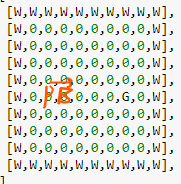

* environment: 
  * Boulder (B) is pushed when player moves (P) into it, with as goal to push the boulder  into the Goal (G)
  * Player starts a random position and bloder and goal are always in the same place.
* Action: 0 to 3 (Four cardinal directions)
* Obs:
  * (player x, player y, bolder x, bolder y)
* Reward/Terminal:
  * Moving into a wall: Reward = -1, done = False
  * Moving the boulder  on the goal: Reward = 1000, done = True
  * Otherwise: Reward = 0, done = False

You can also find a Q-learn function provided with it which returns a rolling mean episode length (how long it takes for the agent to push the boulder in the goal). It also includes some code for early stopping.

In [ ]:
def argmax(a):
    #random argmax
    a = np.array(a)
    return np.random.choice(np.arange(len(a),dtype=int)[a==np.max(a)])
import gymnasium as gym
from gymnasium import spaces
from gymnasium import wrappers
import numpy as np
class Grid_world_boulder(gym.Env):
    
    ######
    # +--------> y (second dim)
    # |
    # |
    # v
    # x (first dim)
    #
    # u=0 -> x+
    # u=1 -> y+
    # u=2 -> x-
    # u=3 -> y-
    def __init__(self):
        
        self.action_space = spaces.Discrete(4) #u = 0, 1, ..., P-1
        self.Goal = 2
        G = self.Goal
        self.Wall = -1
        W = self.Wall
        self.boulder_start = (5,2)
        self.grid = [
                     [W,W,W,W,W,W,W,W,W,W],
                     [W,0,0,0,0,0,0,0,0,W],
                     [W,0,0,0,0,0,0,0,0,W],
                     [W,0,0,0,0,0,0,0,0,W],
                     [W,0,0,0,0,0,0,0,0,W],
                     [W,0,0,0,0,0,0,G,0,W],
                     [W,0,0,0,0,0,0,0,0,W],
                     [W,0,0,0,0,0,0,0,0,W],
                     [W,0,0,0,0,0,0,0,0,W],
                     [W,W,W,W,W,W,W,W,W,W],
                    ]
        self.grid = np.array(self.grid,dtype=int)
        self.Goal_loc = tuple(np.array(np.where(self.grid==2))[:,0])
        self.observation_space = spaces.MultiDiscrete(self.grid.shape)
        self.reset()
        
    
    def reset(self):
        while True:
            self.p = [np.random.randint(low=0,high=self.grid.shape[0]),np.random.randint(low=0,high=self.grid.shape[1])]
            if self.grid[self.p[0],self.p[1]]==0 and tuple(self.p)!=self.boulder_start:
                break
        self.boulder = list(self.boulder_start)
        return tuple(self.p)+tuple(self.boulder)
    
    def step(self, u):
        ########
        #  2
        #  ^
        #3<+>1
        #  v
        #  0
        self.p_old = self.p[:]
        if u==0:
            self.p[0] += 1
        elif u==1:
            self.p[1] += 1
        elif u==2:
            self.p[0] -= 1
        elif u==3:
            self.p[1] -= 1
        
        end_loc = self.grid[self.p[0],self.p[1]]
        if end_loc == self.Wall: #player in wall
            self.p = self.p_old
            reward = -1
            done = False
        elif self.p==self.boulder: #try to move the boulder
            self.boulder_old = self.boulder[:]
            if u==0:
                self.boulder[0] += 1
            elif u==1:
                self.boulder[1] += 1
            elif u==2:
                self.boulder[0] -= 1
            elif u==3:
                self.boulder[1] -= 1
            end_loc_boulder = self.grid[self.boulder[0],self.boulder[1]]
            if end_loc_boulder==self.Goal: #boulder on the goal
                reward = 1000 
                done = True
            elif end_loc_boulder==self.Wall: #boulder in the wall, move boulder and player back
                reward = -1
                done = False
                self.p = self.p_old
                self.boulder = self.boulder_old
            elif end_loc_boulder==0:
                reward = 0
                done = False
        elif end_loc == 0 or end_loc == self.Goal:
            reward = 0
            done = False
        return tuple(self.p)+tuple(self.boulder), reward, done, {}
    
    def render(self, mode='human', Qmat=None):
        for x in range(self.grid.shape[0]):
            for y in range(self.grid.shape[1]):
                el = self.grid[x,y]
                if x==self.p[0] and y==self.p[1]:
                    print('P',end='')
                elif x==self.boulder[0] and y==self.boulder[1]:
                    print('B',end='')
                elif el==self.Wall:
                    print('#',end='')
                elif el==self.Goal:
                    print('G',end='')
                elif Qmat is None:
                    print(' ',end='')
                else:#← ↑ → ↓
                    if isinstance(Qmat,defaultdict):
                        abest = argmax([Qmat[(x,y),a] for a in range(4)])
                    else: #an array
                        abest = argmax(Qmat[x,y])
                    print('↓→↑←'[abest],end='')
            print() 

def Qlearn(env_con, nsteps=5000, callbackfeq=100, alpha=0.2,eps=0.2, gamma=0.99, callback=None):
    from collections import defaultdict
    Qmat = defaultdict(float) #any new argument is set to zero only when needed
    env = env_con()
    env_time = env
    while not isinstance(env_time,wrappers.time_limit.TimeLimit):
        env_time = env_time.env
    ep_lengths = []
    ep_lengths_steps = []
    c = 0
    
    obs, info = env.reset()
    print('goal reached time:')
    for z in range(nsteps):

        if np.random.uniform()<eps:
            action = env.action_space.sample()
        else:
            action = argmax([Qmat[obs,i] for i in range(env.action_space.n)])

        obs_new, reward, terminated, truncated, info = env.step(action)

        if done and not info.get('TimeLimit.truncated',False):
            print(env_time._elapsed_steps, end=' ')
            ep_lengths.append(env_time._elapsed_steps)
            ep_lengths_steps.append(z)
            A = reward - Qmat[obs,action] # adventage
            Qmat[obs,action] += alpha*A
            obs, info = env.reset()
            if len(ep_lengths)>10 and np.mean(ep_lengths[-10:])<20: #early stopping
                c += 1
            if c>300: #early stopping
                break
        else:
            A = reward + gamma*max(Qmat[obs_new, action_next] for action_next in range(env.action_space.n)) - Qmat[obs,action]
            Qmat[obs,action] += alpha*A
            obs = obs_new
            if info.get('TimeLimit.truncated',False):
                ep_lengths.append(env_time._elapsed_steps)
                ep_lengths_steps.append(z)
                obs, info = env.reset()
                print('out', end=' ')
    print()
    return Qmat, np.array(ep_lengths_steps), np.array(ep_lengths)

**a)** *Optional* solve the problem manually and see how the observation space is quite large and the reward is sparse.

In [ ]:
from IPython.display import clear_output
import time
env = Grid_world_boulder() #crease 
print('observation space =',env.observation_space, env.observation_space.nvec)
print('action space =',env.action_space)
obs, info = env.reset() #reset environment
convert = {'down':0,'right':1,'up':2,'left':3} #to convert from text to input number
done = False
while True:
    env.render() # print the maze
    if done:
        if reward==-10:
            print("You Died")
        elif reward==100:
            print('Goal Reached!')
        break
    time.sleep(1/3) # wait a bit
    s = input() # take input from user
    action = convert[s] # convert text to action (0,1,2 or 3)
    clear_output(wait=True)
    obs, reward, terminated, truncated, info = env.step(action) #take action
    print('obs=',obs) # observation/measurment/state
    print('reward=',reward) #reward = -10 if you bump into a wall, 100 if you reach to goal and 0 otherwise
    print('done=',done) #is true if you bump into a wall or solve the maze

**b)** Below you can find the $Q$-learning implementation for this environment which takes an average of 70,000 steps to complete. Why does it take so long?

*tip: How much feedback is the agent getting? How large is the state space? and when are the Q values updated?*

**Answer b):** fill by student


In [ ]:
from matplotlib import pyplot as plt
def roll_mean(ar,start=2000,N=50):
    s = 1-1/N
    k = start
    out = np.zeros(ar.shape)
    for i,a in enumerate(ar):
        k = s*k + (1-s)*a
        out[i] = k
    return out

max_episode_steps = 400
def env_con():
    env = Grid_world_boulder()
    env = wrappers.time_limit.TimeLimit(env,max_episode_steps=max_episode_steps)
    #and reward wrapper
    return env

base_results = []
for z in range(10):
    Qmat, ep_lengths_steps, ep_lengths = Qlearn(env_con,nsteps=500_000)
    base_results.append((ep_lengths_steps, ep_lengths))
#     plt.plot(ep_lengths_steps,ep_lengths,'.')
    plt.plot(ep_lengths_steps,roll_mean(ep_lengths,start=max_episode_steps),'b')
plt.ylabel('mean episode length')
plt.xlabel('steps')
plt.show()

In [ ]:
#render block
from collections import defaultdict
import time
env = env_con()
obs, info = env.reset()
try:
    env.render()
    for i in range(100):
        action = argmax([Qmat[obs,i] for i in range(env.action_space.n)])
        obs, reward, terminated, truncated, info = env.step(action)
        env.render()
        time.sleep(1/60)
        print(obs,reward,action,done,info) #check info on timelimit
        if done:
            break
        #check on info['TimeLimit.truncated']
finally:
    env.close()

One of the best ways to reduce this aimless wandering of the agent is to change the reward function from a sparse to a dense one. This means that the agent does not only receive a reward on completion but also on the path of completion. You can think of them like breadcrumbs that guide the agent. 

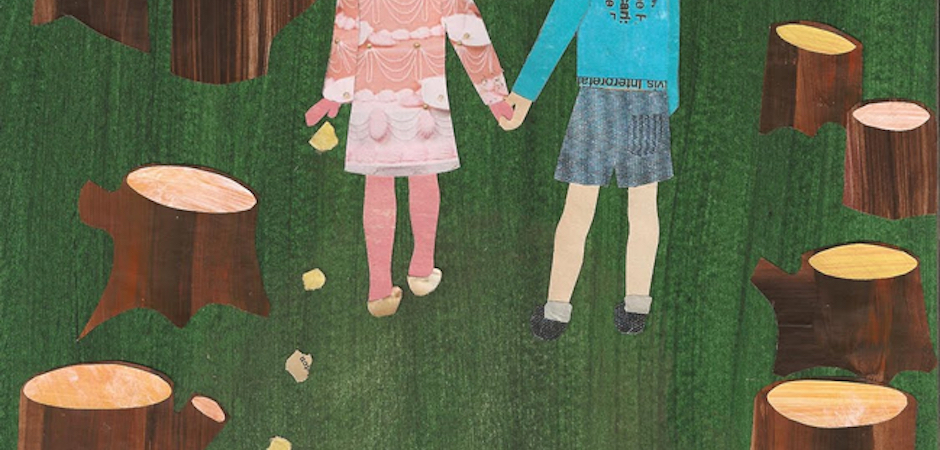

[Image Ref](https://usabilla.com/blog/breadcrumb-navigation-good-website-usability-not/)

**c)** Transform the reward function from a sparse to a dense reward function by giving it rewards when progressing towards the end goal. You can use the skeleton of a reward wrapper found below. (This is a very open-ended question and multiple solutions are possible, be creative and experiment!) 

*tip: keep the very large reward when getting to the goal*

In [ ]:
class Dense_reward_Grid(gym.Wrapper):
    def __init__(self, env):
        super(Dense_reward_Grid, self).__init__(env)

    def step(self, action):
        goal_x, goal_y = self.Goal_loc
        # c) Fill this
        observation, reward, terminated, truncated, info = self.env.step(action)
        player_x, player_y, boulder_x, boulder_y = observation
        
        # c) Fill this
        return observation, reward_new, done, info

max_episode_steps = 400
def env_con_new():
    env = Grid_world_boulder()
    env = wrappers.time_limit.TimeLimit(env,max_episode_steps=max_episode_steps)
    env = Dense_reward_Grid(env)
    #and reward wrapper
    return env

new_results = []
for z in range(10):
    Qmat, ep_lengths_steps, ep_lengths = Qlearn(env_con_new,nsteps=500_000)
    new_results.append((ep_lengths_steps, ep_lengths))
    plt.plot(ep_lengths_steps,roll_mean(ep_lengths,start=max_episode_steps),'b')
plt.ylabel('mean episode length')
plt.xlabel('steps')
plt.show()

In [ ]:
for results, c, name in [(base_results,'r', 'sparse rewards'),(new_results,'b','your dense rewards')]:

    for i,(ep_lengths_steps, ep_lengths) in enumerate(results):
        if i==0:
            plt.plot(ep_lengths_steps,roll_mean(ep_lengths,start=max_episode_steps),color=c,label=name)
        else:
            plt.plot(ep_lengths_steps,roll_mean(ep_lengths,start=max_episode_steps),color=c)
plt.legend()
plt.show()